<a href="https://colab.research.google.com/github/faradishaldina/MachineLearning_2023/blob/main/%5B2%5DUTS_Faradisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation Using Clustering

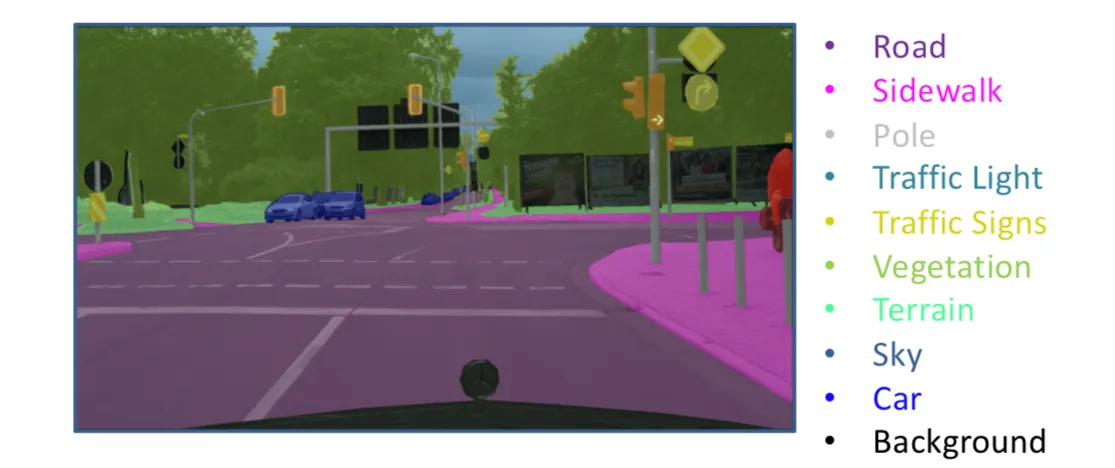

Segmentation is one of the methods used to distinguish one object from another in an image. This can be done by grouping the pixel values in the image based on their color proximity.

In this midterm exam, you are asked to perform segmentation of vehicle license plates in Indonesia. The purpose of segmentation in this case is to facilitate the reading of the license plate before further processes, such as character recognition on the license plate.

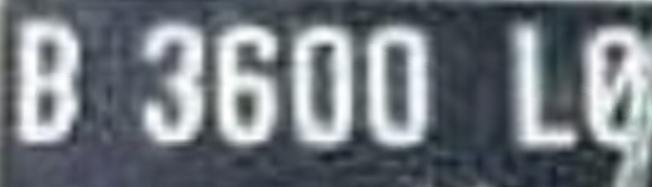

Based on the given case presentation, you are required to:

1. Select 5 license plate images for each group member from the provided dataset. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Perform segmentation on the license plate images to enhance the characters on the license plates.
3. You can use the K-Means algorithm as explained in previous practical sessions or any other clustering algorithm.
4. You are allowed to perform data preprocessing on the images, such as:
    - Changing the color space
    - Dimension reduction
    - Etc.
5. Display a comparison of the images before and after segmentation.

**Open Challenge** (Optional)
- How can you evaluate the results of the segmentation?
- Apply it to this case!

**Note:**
1. The image loading process is exemplified using the OpenCV library.
2. By default, OpenCV will load images in the BGR format.

### **Code Example**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

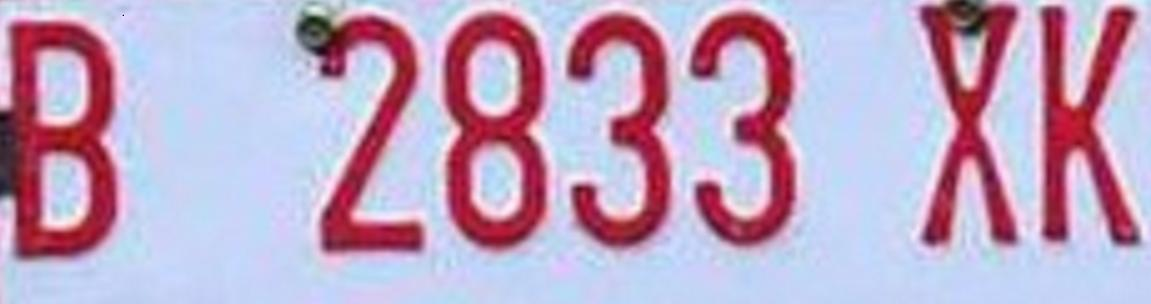

In [16]:
# Load Gambar
img = cv2.imread('2.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue


In [18]:

h, w, ch= img.shape
print(h)
print(w)
print(ch)


304
1151
3


In [19]:

data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(349904, 3)

In [20]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)


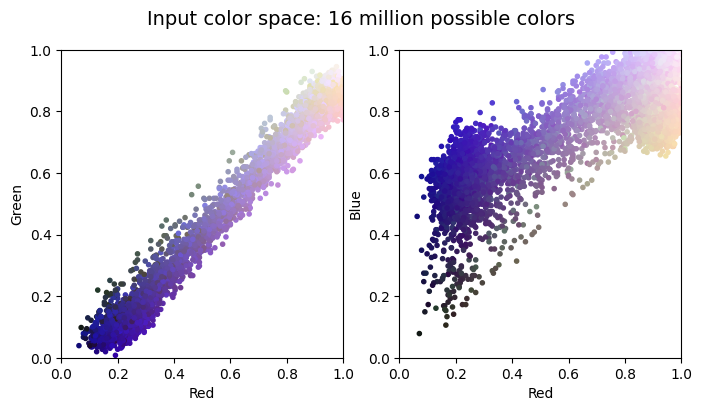

In [21]:

plot_pixels(data, title='Input color space: 16 million possible colors')



### **Desired Result**

In [ ]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)

### **Answer**

In [25]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pytesseract
from sklearn.cluster import MiniBatchKMeans

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,278 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

### **Load Dataset**

In [28]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the folder containing images
folder_path = '/content/drive/MyDrive/plat'

# Get the list of files in the folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Print the list of file names
print(file_names)


Mounted at /content/drive
['5.jpg', '3.jpg', '1.jpg', '4.jpg', '2.jpg']


### **Preprocessing Data**

**K- Means clustering to change color**

In [29]:
def change_color(image):
    h, w, ch = image.shape
    data = image.astype(np.float32) / 255.0
    data = data.reshape(h * w, ch)

    kmeans = MiniBatchKMeans(2)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    recolored = (new_colors.reshape(h, w, ch) * 255).astype(np.uint8)

    return recolored

**Threshold to change color to binary BnW**

In [30]:
def enhance_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    if np.mean(thresh) > 128:  # Logika if untuk memastikan bahwa angka menjadi putih dan background menjadi hitam
        thresh = cv2.bitwise_not(thresh)

    return thresh

**Denoising use medianBlur**

In [31]:
def remove_noise(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

**Invert Color**

In [32]:

def invert_colors(image):
    return cv2.bitwise_not(image)

**Image Segmentation**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


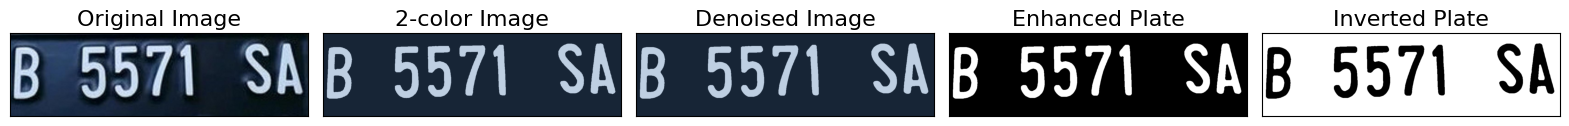

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


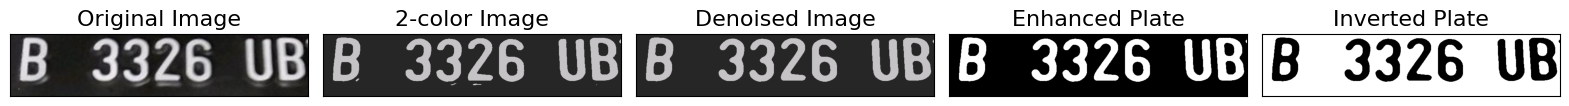

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


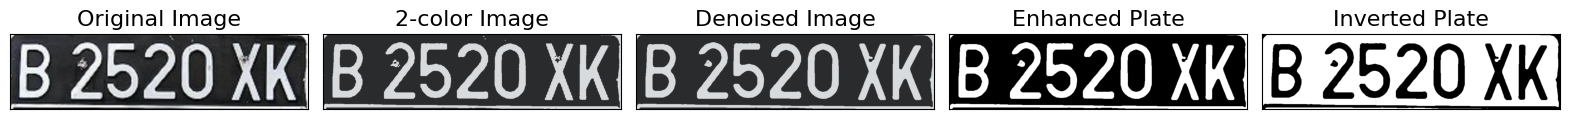

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


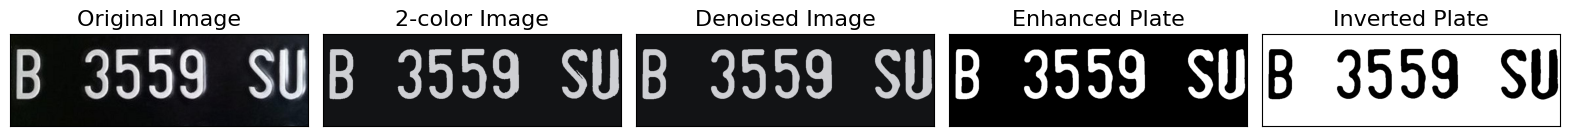

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


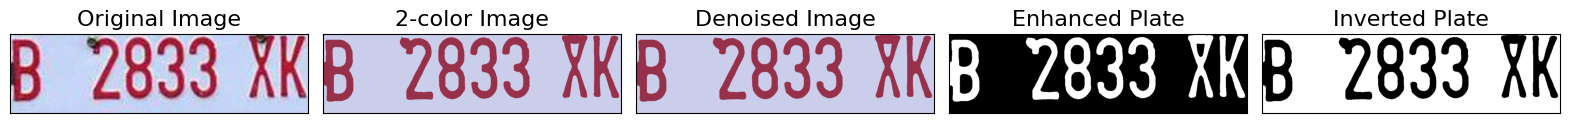

In [33]:
for i, file_name in enumerate(file_names):
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path)

    recolored = change_color(img)
    denoised_image = remove_noise(recolored, kernel_size=9)
    enhanced_plate = enhance_plate(denoised_image)
    inverted_plate = invert_colors(enhanced_plate)

    # Menampilkan gambar asli, gambar dengan warna diubah, hasil setelah menghilangkan noise, dan hasil akhir setelah meningkatkan kejelasan nomor plat
    fig, ax = plt.subplots(1, 5, figsize=(20, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Denoised Image', size=16)
    ax[3].imshow(enhanced_plate, cmap='gray')
    ax[3].set_title('Enhanced Plate', size=16)
    ax[4].imshow(inverted_plate, cmap='gray')
    ax[4].set_title('Inverted Plate', size=16)
    plt.show()

**Evaluate using pytesseract**

In [34]:
def extract_text(image):
    return pytesseract.image_to_string(image)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


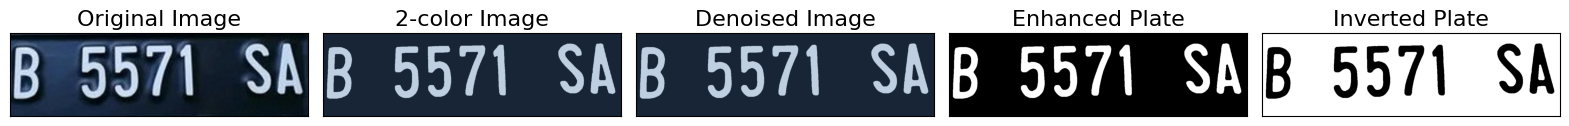

Extraction Text Result 5.jpg:
 



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


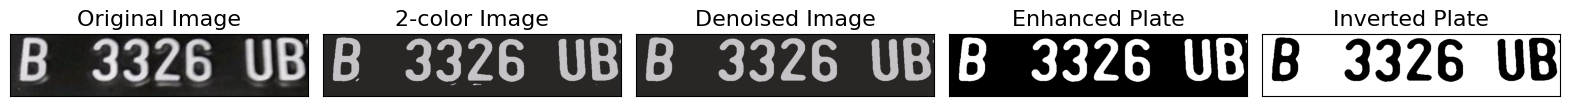

Extraction Text Result 3.jpg:
B 3326 UB



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


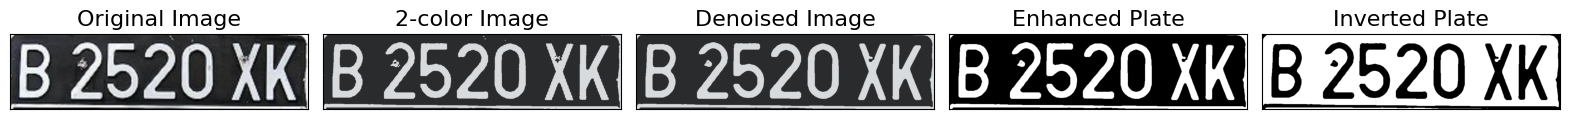

Extraction Text Result 1.jpg:



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


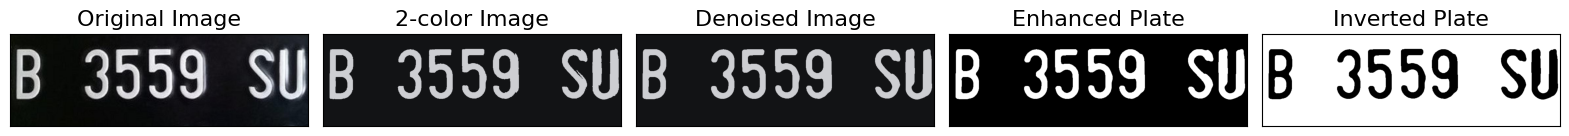

Extraction Text Result 4.jpg:
B 3909 SU



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


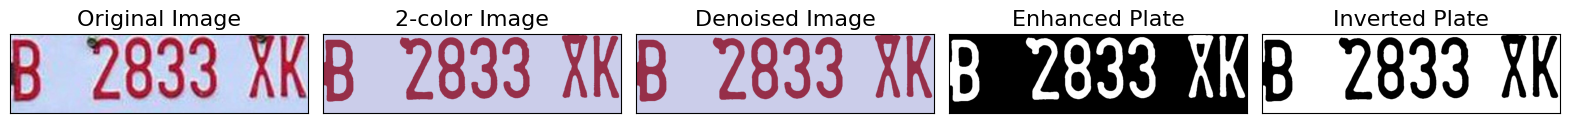

Extraction Text Result 2.jpg:
B 2833 KK



In [36]:

for i, file_name in enumerate(file_names):
  image_path = os.path.join(folder_path, file_name)
  img = cv2.imread(image_path)

  recolored = change_color(img)
  denoised_image = remove_noise(recolored, kernel_size=9)
  enhanced_plate = enhance_plate(denoised_image)
  inverted_plate = invert_colors(enhanced_plate)
  extracted_text = extract_text(inverted_plate)

  fig, ax = plt.subplots(1, 5, figsize=(20, 6), subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(wspace=0.05)
  ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax[0].set_title('Original Image', size=16)
  ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
  ax[1].set_title('2-color Image', size=16)
  ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
  ax[2].set_title('Denoised Image', size=16)
  ax[3].imshow(enhanced_plate, cmap='gray')
  ax[3].set_title('Enhanced Plate', size=16)
  ax[4].imshow(inverted_plate, cmap='gray')
  ax[4].set_title('Inverted Plate', size=16)
  plt.show()
  print(f"Extraction Text Result {file_name}:")
  print(extracted_text)